### Linear Regression and Learning Curve challenges


##### Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (log(x))

(The second one should fit really well, since it has the same form as the underlying model!)



In [244]:
def log_func(x):
    b0 = 0.5
    b1 = 0.25
    epsilon = -0.21
    return b0 + b1*np.log(x) +  epsilon



In [206]:
np.arange(10), np.log(32)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 3.4657359027997265)

In [267]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn import linear_model,ensemble, tree, model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import random as rd
#import ml_insights as mli
from sklearn.metrics import mean_squared_error, r2_score

#a = np.array(np.arange(1,201))
a = np.arange(200)+2
#b = 2*random.random() + np.log(a) * random.random() * ( 1 if random.random() > 0.5 else -1 )
b = log_func(a)

c_sample = [ (1-rd.random()*(0.3)) *  x  for x in b]
#c_sample = [ (1-rd.random()*(0.15)) *  x  for x in b]
#c_sample = [ (1-rd.random()*(0.15)) *  x  for x in b]

d = {'x': a, 'y': b,  'z': c_sample}
df = pd.DataFrame(data=d).reset_index()

#df["x2"] = df.x**2
#df["xlog"] = np.log(df.x)
#list(zip(y, y**2, y_pred))[:20]

df.head()



,index,x,y,z
0,0,2,0.463287,0.449960
1,1,3,0.564653,0.485949
2,2,4,0.636574,0.525422
3,3,5,0.692359,0.529855
4,4,6,0.737940,0.659455


/Users/michaellin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/michaellin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


mse:  6.85476985806e-32  r2:  1.0


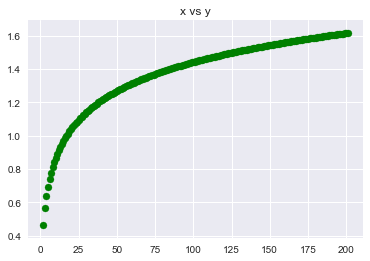

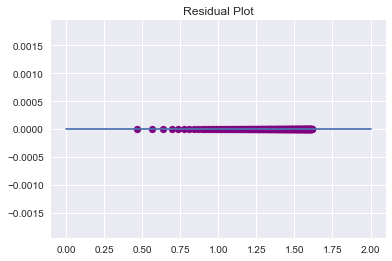

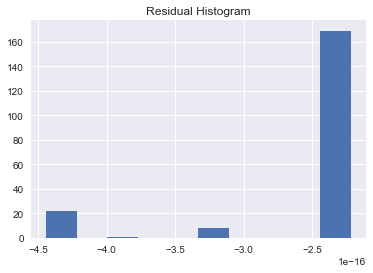

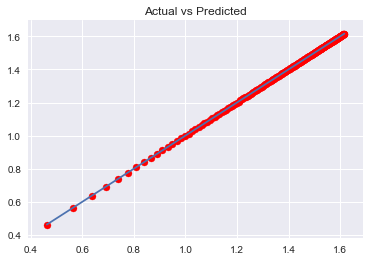

In [272]:
%matplotlib inline

x = df.x.reshape((200,1))
y = df.y.reshape((200,1))
#x2 = df.x2.reshape((200,1))
#xlog = df.xlog.reshape((200,1))

x2 = np.log(x)


lr_model = LinearRegression()
lr_model.fit(x2, y)
y_pred = lr_model.predict(x2)

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

plt.figure()
plt.scatter(x, y, c="green")
plt.title("x vs y")

plt.figure()
plt.plot(np.linspace(0,2,1000), np.linspace(0,0,1000))
#plt.plot(np.linspace(0,3,1000), np.linspace(0,0,1000))
plt.scatter(y, y - y_pred, c="purple")
plt.title("Residual Plot")

plt.figure()
plt.hist(y - y_pred)
plt.title("Residual Histogram")

plt.figure()
plt.plot(y, y)
plt.scatter(y, y_pred, c="red")
plt.title("Actual vs Predicted")

#calculate mean square error
mse = mean_squared_error(y, y_pred)

# what's the R2 is for linear regression
r2 = r2_score(y, y_pred)

print("mse: ", mse, " r2: ", r2)



##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)



In [249]:
def quadratic_func(x):
    b0 = 0.5
    b1 = 0.25
    b2 = 0.35
    epsilon = -0.21
    return b0 + b1*x + b2*x**2 + epsilon


/Users/michaellin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()
/Users/michaellin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


mse:  10.4583445877  r2:  0.999999297961


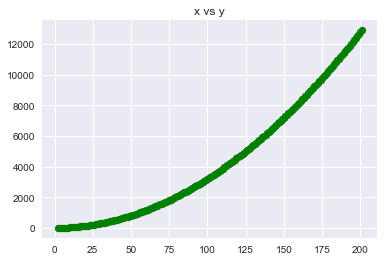

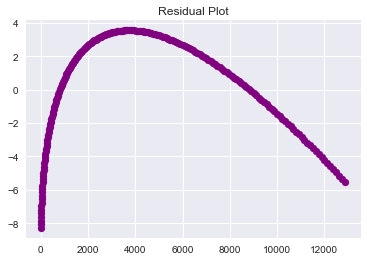

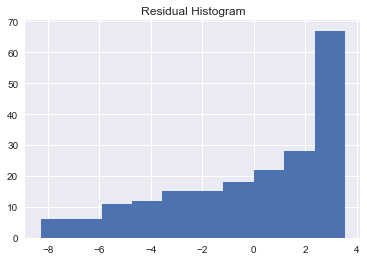

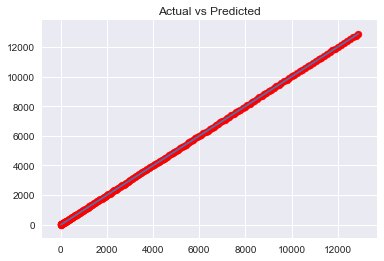

In [264]:
%matplotlib inline

a = np.arange(200)+2
b = quadratic_func(a)* (1-random.random()*.15)

d = {'x': a, 'y': b}
df = pd.DataFrame(data=d).reset_index()

df.head()

x = df.x.reshape((200,1))
y = df.y.reshape((200,1))

#x2 = x     # fitting x
x2 = x**2  # fitting x^2

#=======================================

lr_model = LinearRegression()
lr_model.fit(x2, y)
y_pred = lr_model.predict(x2)

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

plt.figure()
plt.scatter(x, y, c="green")
plt.title("x vs y")

plt.figure()
plt.plot(np.linspace(0,2,1000), np.linspace(0,0,1000))
#plt.plot(np.linspace(0,3,1000), np.linspace(0,0,1000))
plt.scatter(y, y - y_pred, c="purple")
plt.title("Residual Plot")

plt.figure()
plt.hist(y - y_pred)
plt.title("Residual Histogram")

plt.figure()
plt.plot(y, y)
plt.scatter(y, y_pred, c="red")
plt.title("Actual vs Predicted")

#calculate mean square error
mse = mean_squared_error(y, y_pred)

# what's the R2 is for linear regression
r2 = r2_score(y, y_pred)

print("mse: ", mse, " r2: ", r2)

### Results (a) on fitting X

    mse:  914112.699844  (HIGH ERROR)
    r2:  0.939627645221
        
### Results (b) on fitting x^2

    mse:  10.0582674839  
    r2:  0.999999297961



mse:  757984.712158  r2:  0.942908130236


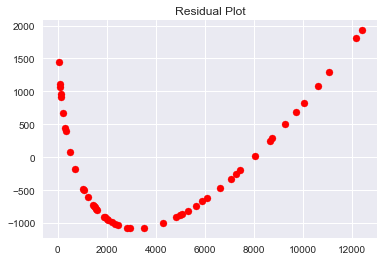

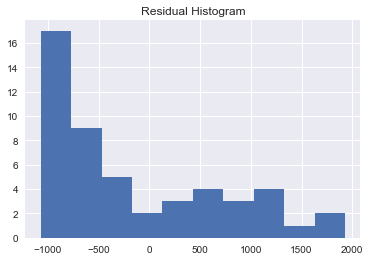

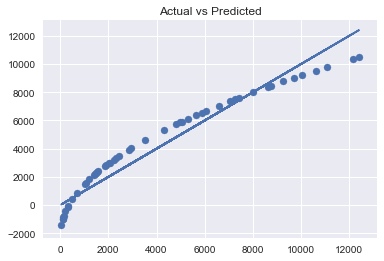

In [261]:

# split data into train & test
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = .25, random_state=42)

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

### Get the predictions on the training & test set
y_train_pred = lr_model.predict(x_train)
y_test_pred  = lr_model.predict(x_test)


plt.plot(np.linspace(0,1,1000), np.linspace(0,0,1000))
plt.scatter(y_test, y_test - y_test_pred, c="red")
plt.title("Residual Plot")

plt.figure()
plt.hist(y_test - y_test_pred)
plt.title("Residual Histogram")

plt.figure()
plt.plot(y_test, y_test)
plt.scatter(y_test, y_test_pred)
plt.title("Actual vs Predicted")


#calculate mean square error
mse = mean_squared_error(y_test, y_test_pred)

# what's the R2 is for linear regression
r2 = r2_score(y_test, y_test_pred)

print("mse: ", mse, " r2: ", r2)


#### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC



In [275]:
%matplotlib inline

x.shape, y.shape

a = np.arange(200)+2

len(a)

200

In [281]:
[i for i in range(8)]

[0, 1, 2, 3, 4, 5, 6]

/Users/michaellin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
/Users/michaellin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


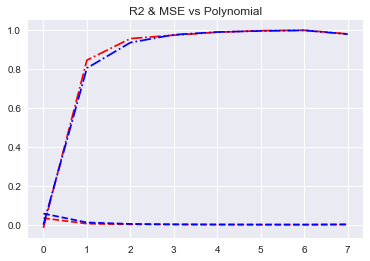

In [311]:
from sklearn.preprocessing import PolynomialFeatures


%matplotlib inline

a = np.arange(200)+2
b = log_func(a)

d = {'x': a, 'y': b}
df = pd.DataFrame(data=d).reset_index()

x = df.x.reshape((200,1))
y = df.y.reshape((200,1))



def my_regress(x_train, y_train, x_test, y_test):

    # train the model on the training set
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)

    ### Get the predictions on the training & test set
    y_train_pred = lr_model.predict(x_train)
    y_test_pred  = lr_model.predict(x_test)


    #calculate mean square error
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)

    # what's the R2 is for linear regression
    r2_test = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)

    return (mse_test, mse_train, r2_test, r2_train)


my_errors = []
for i in range(8):
    poly = PolynomialFeatures(i)
    x_poly = poly.fit_transform(x.reshape(-1,1))

    # split data into train & test
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x_poly, y, test_size = .25, random_state=42)
    
    (mse_test, mse_train, r2_test, r2_train) = my_regress(x_train, y_train, x_test, y_test)
    
    my_errors.append( (i, mse_test, mse_train, r2_test, r2_train) )
    
    #print("mse_test: ", mse_test, " r2_test: ", r2_test, " r2_train", r2_train)
    
    
my_errors    

x_line         = [x[0] for x in my_errors]
mse_test_line  = [x[1] for x in my_errors]
mse_train_line = [x[2] for x in my_errors]
r2_test_line   = [x[3] for x in my_errors]
r2_train_line  = [x[4] for x in my_errors]


plt.figure()

plt.plot(x_line, mse_test_line, "r--")
plt.plot(x_line, r2_test_line, "r-.")

plt.plot(x_line, mse_train_line, "b--")
plt.plot(x_line, r2_train_line, "b-.")

plt.title("R2 & MSE vs Polynomial")



##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

/Users/michaellin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
/Users/michaellin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


[(1,
  0.0010260847287797954,
  9.068437213743926e-05,
  0.86331770071258751,
  0.99046706220811964),
 (2,
  0.00036704360479109899,
  0.0011813454942002852,
  0.97696661338325341,
  0.93377005122819834),
 (3,
  0.0046885873826635373,
  0.00088742716029509706,
  0.88691794153161374,
  0.94333935892294218),
 (4,
  0.0098248272402686361,
  0.00075207739508322815,
  0.81263087685164526,
  0.95111813891473584),
 (5,
  0.0064107473924319052,
  0.0016415964675736117,
  0.81849722391701518,
  0.93932604226544358),
 (6,
  0.0030513633601492026,
  0.0037852384539667893,
  0.69502062021932209,
  0.8939869434919413),
 (7,
  0.0027540011062466103,
  0.0044809202920304851,
  0.64094779063094487,
  0.89155539464491484),
 (8,
  0.0034702915849810223,
  0.0047622658211898868,
  0.84714618223740501,
  0.87958464213171683),
 (9,
  0.002707518418845754,
  0.005514611158159175,
  0.92761252351343648,
  0.84987468184004478)]

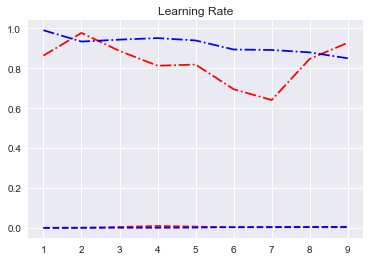

In [320]:
from sklearn.preprocessing import PolynomialFeatures


%matplotlib inline

a = np.arange(200)+2
b = log_func(a)

d = {'x': a, 'y': b}
df = pd.DataFrame(data=d).reset_index()

x = df.x.reshape((200,1))
y = df.y.reshape((200,1))



def my_regress(x_train, y_train, x_test, y_test):

    # train the model on the training set
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)

    ### Get the predictions on the training & test set
    y_train_pred = lr_model.predict(x_train)
    y_test_pred  = lr_model.predict(x_test)


    #calculate mean square error
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)

    # what's the R2 is for linear regression
    r2_test = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)

    return (mse_test, mse_train, r2_test, r2_train)


my_errors = []
for i in range(1,10):
    x_subset = x[:i*5]
    y_subset = y[:i*5]
    
    # split data into train & test
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x_subset, y_subset, test_size = .25, random_state=42)
    
    (mse_test, mse_train, r2_test, r2_train) = my_regress(x_train, y_train, x_test, y_test)
    
    my_errors.append( (i, mse_test, mse_train, r2_test, r2_train) )
    
    #print("mse_test: ", mse_test, " r2_test: ", r2_test, " r2_train", r2_train)
    
    
    

x_line         = [x[0] for x in my_errors]
mse_test_line  = [x[1] for x in my_errors]
mse_train_line = [x[2] for x in my_errors]
r2_test_line   = [x[3] for x in my_errors]
r2_train_line  = [x[4] for x in my_errors]


plt.figure()

plt.plot(x_line, mse_test_line, "r--")
plt.plot(x_line, r2_test_line, "r-.")

plt.plot(x_line, mse_train_line, "b--")
plt.plot(x_line, r2_train_line, "b-.")

plt.title("Learning Rate")

my_errors